In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import seaborn as sbn
from sklearn import preprocessing

In [2]:
veri=pd.read_excel("merc.xlsx")
print(veri)

       year  price transmission  mileage  tax   mpg  engineSize
0      2005   5200    Automatic    63000  325  32.1         1.8
1      2017  34948    Automatic    27000   20  61.4         2.1
2      2016  49948    Automatic     6200  555  28.0         5.5
3      2016  61948    Automatic    16000  325  30.4         4.0
4      2016  73948    Automatic     4000  325  30.1         4.0
...     ...    ...          ...      ...  ...   ...         ...
13114  2020  35999    Automatic      500  145  55.4         2.0
13115  2020  24699    Automatic     2500  145  55.4         2.0
13116  2019  30999    Automatic    11612  145  41.5         2.1
13117  2019  37990    Automatic     2426  145  45.6         2.0
13118  2019  54999    Automatic     2075  145  52.3         2.9

[13119 rows x 7 columns]


In [40]:
x=veri.drop(["price","transmission"],axis=1)
y=veri.iloc[:,1]
deg=veri.iloc[:,2].values.reshape(-1,1)
deg2=veri.drop(["transmission"],axis=1)


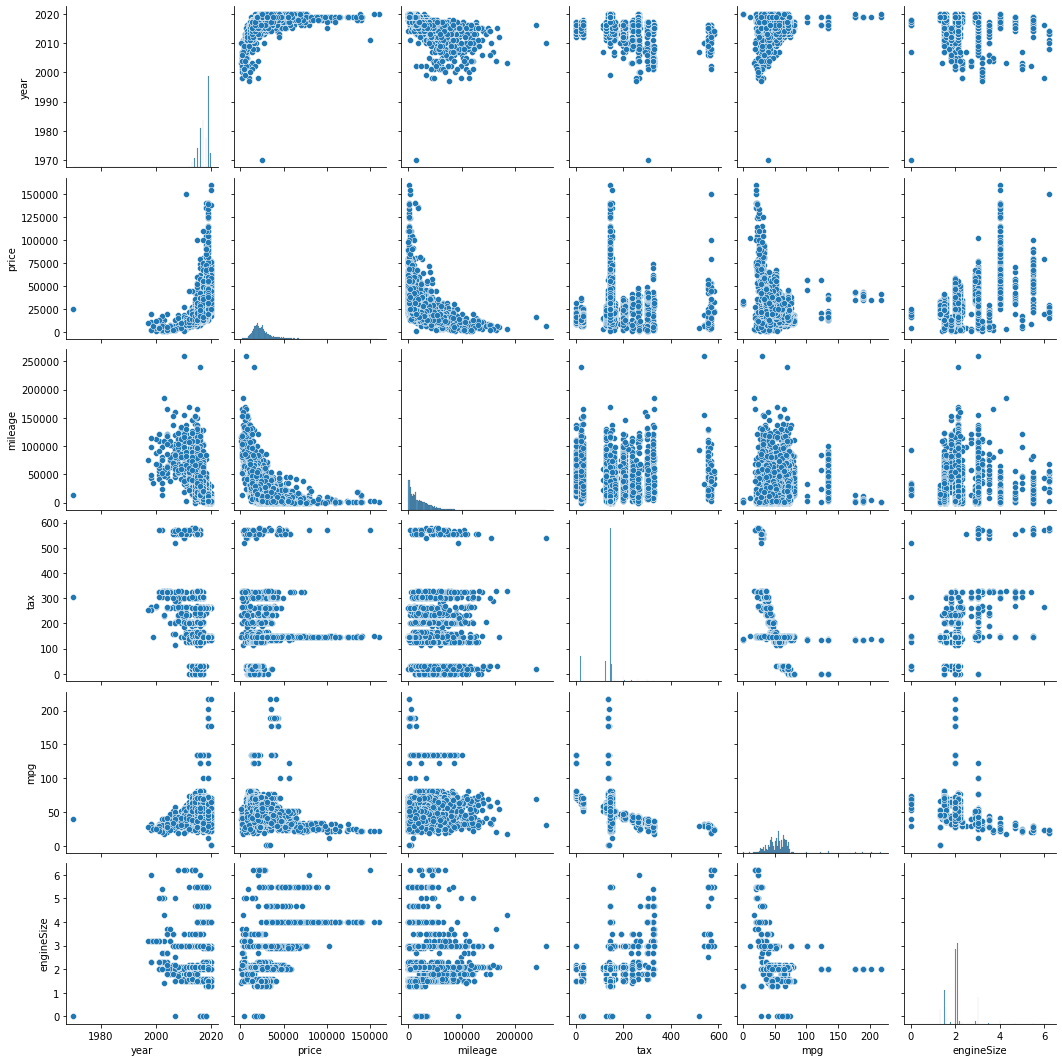

In [38]:
sbn.pairplot(veri)

In [41]:
scaler=MinMaxScaler()
ohe=preprocessing.OneHotEncoder()
deg=ohe.fit_transform(deg).toarray()
deg=pd.DataFrame(data=deg,index=range(13119),columns=["Automatic","Manual","Semi-Auto","other"])


In [42]:
deg2=pd.concat([deg,deg2],axis=1)
deg2.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
Manual       -0.274886
Automatic    -0.018783
Semi-Auto    -0.009229
other         0.190593
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

In [7]:
x=pd.concat([x,deg],axis=1)


       year  mileage  tax   mpg  engineSize  Automatic  Manual  Semi-Auto  \
0      2005    63000  325  32.1         1.8        1.0     0.0        0.0   
1      2017    27000   20  61.4         2.1        1.0     0.0        0.0   
2      2016     6200  555  28.0         5.5        1.0     0.0        0.0   
3      2016    16000  325  30.4         4.0        1.0     0.0        0.0   
4      2016     4000  325  30.1         4.0        1.0     0.0        0.0   
...     ...      ...  ...   ...         ...        ...     ...        ...   
13114  2020      500  145  55.4         2.0        1.0     0.0        0.0   
13115  2020     2500  145  55.4         2.0        1.0     0.0        0.0   
13116  2019    11612  145  41.5         2.1        1.0     0.0        0.0   
13117  2019     2426  145  45.6         2.0        1.0     0.0        0.0   
13118  2019     2075  145  52.3         2.9        1.0     0.0        0.0   

       other  
0        0.0  
1        0.0  
2        0.0  
3        0.0  


In [23]:
x1,x2,y1,y2=train_test_split(x,y,test_size=0.33,random_state=13)

In [24]:
scaler.fit(x1)


MinMaxScaler()

In [25]:
x1=scaler.transform(x1)
x2=scaler.transform(x2)

In [26]:
model=Sequential()
model.add(Dense(15,activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="rmsprop",loss="mse")

In [27]:
model.fit(x1,y1,epochs=250)


Epoch 1/250
275/275 [==============================] - 1s 672us/step - loss: 528503712.0000
Epoch 2/250
275/275 [==============================] - 0s 677us/step - loss: 115687904.0000
Epoch 3/250
275/275 [==============================] - 0s 681us/step - loss: 104170672.0000
Epoch 4/250
275/275 [==============================] - 0s 692us/step - loss: 92110944.0000
Epoch 5/250
275/275 [==============================] - 0s 679us/step - loss: 76356520.0000
Epoch 6/250
275/275 [==============================] - 0s 692us/step - loss: 57138908.0000
Epoch 7/250
275/275 [==============================] - 0s 697us/step - loss: 43057068.0000
Epoch 8/250
275/275 [==============================] - 0s 684us/step - loss: 37674440.0000
Epoch 9/250
275/275 [==============================] - 0s 678us/step - loss: 35098264.0000
Epoch 10/250
275/275 [==============================] - 0s 679us/step - loss: 34285432.0000
Epoch 11/250
275/275 [==============================] - 0s 692us/step - loss: 33255292

275/275 [==============================] - 0s 658us/step - loss: 26853182.0000
Epoch 91/250
275/275 [==============================] - 0s 655us/step - loss: 26996074.0000
Epoch 92/250
275/275 [==============================] - 0s 656us/step - loss: 27015702.0000
Epoch 93/250
275/275 [==============================] - 0s 652us/step - loss: 26978756.0000
Epoch 94/250
275/275 [==============================] - 0s 657us/step - loss: 26758834.0000
Epoch 95/250
275/275 [==============================] - 0s 653us/step - loss: 26756232.0000
Epoch 96/250
275/275 [==============================] - 0s 652us/step - loss: 26921178.0000
Epoch 97/250
275/275 [==============================] - 0s 649us/step - loss: 26750052.0000
Epoch 98/250
275/275 [==============================] - 0s 658us/step - loss: 26807014.0000
Epoch 99/250
275/275 [==============================] - 0s 659us/step - loss: 26872558.0000
Epoch 100/250
275/275 [==============================] - 0s 687us/step - loss: 26618604.0000


275/275 [==============================] - 0s 661us/step - loss: 24605602.0000
Epoch 179/250
275/275 [==============================] - 0s 663us/step - loss: 24535712.0000
Epoch 180/250
275/275 [==============================] - 0s 652us/step - loss: 24451976.0000
Epoch 181/250
275/275 [==============================] - 0s 660us/step - loss: 24777478.0000
Epoch 182/250
275/275 [==============================] - 0s 657us/step - loss: 24755134.0000
Epoch 183/250
275/275 [==============================] - 0s 655us/step - loss: 24548470.0000
Epoch 184/250
275/275 [==============================] - 0s 681us/step - loss: 24656980.0000
Epoch 185/250
275/275 [==============================] - 0s 694us/step - loss: 24579638.0000
Epoch 186/250
275/275 [==============================] - 0s 715us/step - loss: 24453622.0000
Epoch 187/250
275/275 [==============================] - 0s 665us/step - loss: 24244726.0000
Epoch 188/250
275/275 [==============================] - 0s 656us/step - loss: 24662

In [28]:
loss=model.history.history["loss"]

<AxesSubplot:>

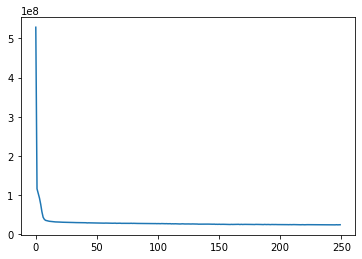

In [29]:
sbn.lineplot(x=range(len(loss)),y=loss)


In [30]:
tahmin=model.predict(x2)
tahmin=pd.DataFrame(tahmin,columns=["Tahmin"])


In [31]:
y2=np.array(y2)
gerceky= pd.DataFrame(y2,columns=["Gerçek Y"])
Sonuc=pd.concat([tahmin,gerceky],axis=1)
Sonuc.columns=["Tahmin","Gerçek Y"]

In [32]:
Sonuc

,Tahmin,Gerçek Y
0,27095.544922,29980
1,25569.751953,25879
2,29511.662109,29995
3,19865.708984,18429
4,26506.367188,21690
...,...,...
4325,20041.001953,22000
4326,27217.080078,27776
4327,13385.885742,15498
4328,15504.747070,17999


<AxesSubplot:xlabel='Tahmin', ylabel='Gerçek Y'>

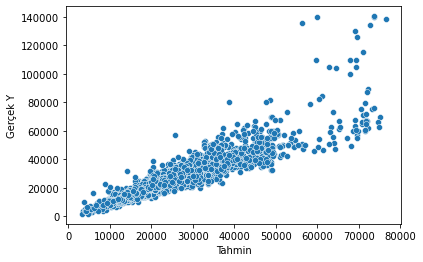

In [33]:
sbn.scatterplot(x="Tahmin",y="Gerçek Y",data=Sonuc)

In [34]:
mean_absolute_error(Sonuc["Tahmin"],Sonuc["Gerçek Y"])

3130.147718159101

In [35]:
mean_squared_error(Sonuc["Tahmin"],Sonuc["Gerçek Y"])

30274091.984096266